In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [3]:
#表示される列数・行数を増やしておく
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",500)

In [33]:
#データの読み込み
boxscore=pd.read_csv("data/games_boxscore_202021.csv")
summary=pd.read_csv("data/games_summary_202021.csv")
teams=pd.read_csv("data/teams.csv")

In [34]:
#boxscoreから金丸晃輔選手のデータを抽出する
kanamaru=boxscore[boxscore["Player"]=="金丸晃輔"]

In [35]:
#teamsからB1_2020-21シーズンの三河のデータだけ取り出す
teams=teams[teams["Season"]=="2020-21"]
teams=teams[teams["NameShort"]=="三河"]
teams

,TeamId,Season,League,NameShort,NameLong,Division
156,728,2020-21,B1,三河,シーホース三河,西地区


In [36]:
#summaryとteamsをjoinして、summaryから三河のデータだけ取り出す
summary=teams.merge(summary,on="TeamId")

In [37]:
#indexをリセットする
kanamaru=kanamaru.reset_index()
summary=summary.reset_index()

In [38]:
#kanamaruから効率の指標を計算する
#eFGから
eFG=[]
for fgm,f3gm,fga in zip(kanamaru["FGM"],kanamaru["F3GM"],kanamaru["FGA"]):
    if fga==0:
        eFG.append(np.nan)
    else:
        eFG.append((fgm+0.5*f3gm)/fga)

kanamaru["eFG"]=eFG

In [39]:
#TS%を計算する
TS=[]
for pts,fga,fta in zip(kanamaru["PTS"],kanamaru["FGA"],kanamaru["FTA"]):
    if 2*(fga+(0.44*fta))==0:
        TS.append(np.nan)
    else:
        TS.append(pts/(2*(fga+(0.44*fta))))

kanamaru["TS%"]=TS

In [40]:
#USG%の分子を計算してboxscoreに追加する
usg=[]
for fga,fta,to in zip(kanamaru["FGA"],kanamaru["FTA"],kanamaru["TO"]):
    usg.append(fga+(0.44*fta)+to)
    
kanamaru["usg"]=usg

In [43]:
#boxscoreから必要な列だけ抽出する
kanamaru=kanamaru.loc[:,["Player","MIN","ScheduleKey","eFG","TS%","usg"]]

In [45]:
#summaryからPOSSを計算する
poss=[]
for f2ga,f3ga,fta,orb,to in zip(summary["F2GA"],summary["F3GA"],summary["FTA"],summary["OR"],summary["TO"]):
    fga=f2ga+f3ga
    poss.append(fga+fta*0.44-orb+to)
summary["POSS"]=poss

In [46]:
#summaryから必要な列だけを抽出する
summary=summary.loc[:,["NameShort","ScheduleKey","POSS"]]

In [47]:
#boxscoreとsummaryをTeamIdでjoinする
data=summary.merge(kanamaru,on="ScheduleKey")
data

,NameShort,ScheduleKey,POSS,Player,MIN,eFG,TS%,usg
0,三河,5922,68.16,金丸晃輔,28.33,0.909091,0.883838,11.88
1,三河,5968,64.48,金丸晃輔,21.40,0.333333,0.333333,3.00
2,三河,5882,67.56,金丸晃輔,23.52,0.000000,0.170068,6.88
3,三河,5952,79.28,金丸晃輔,25.63,0.142857,0.142857,8.00
4,三河,5859,75.68,金丸晃輔,35.07,0.718750,0.733753,19.08
5,三河,5858,70.68,金丸晃輔,27.60,0.357143,0.357143,8.00
6,三河,5883,69.44,金丸晃輔,31.47,0.593750,0.606236,18.32
7,三河,5969,68.52,金丸晃輔,18.22,0.142857,0.253807,7.88
8,三河,5911,72.20,金丸晃輔,31.90,0.800000,0.827206,19.32
9,三河,5910,69.08,金丸晃輔,35.05,0.733333,0.755668,16.88


In [48]:
#USG%を計算してdataに追加する
USG=[]
for poss, usg in zip(data["POSS"],data["usg"]):
    USG.append(usg/poss)
    
data["USG%"]=USG

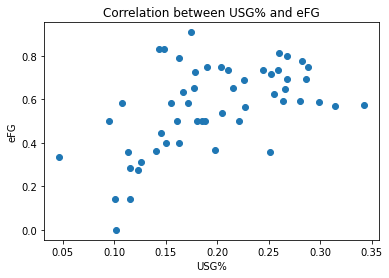

USG%とeFGの相関係数は、0.5298238962451095


In [50]:
#USG%とeFGの相関を調べる
plt.plot(data["USG%"],data["eFG"],"o")
plt.title("Correlation between USG% and eFG")
plt.ylabel("eFG")
plt.xlabel("USG%")
plt.show()

print("USG%とeFGの相関係数は、"+str(data["USG%"].corr(data["eFG"])))

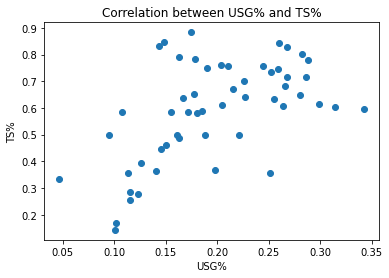

USG%とTS%の相関係数は、0.5559426574271056


In [51]:
#USG%とTS%の相関を調べる
plt.plot(data["USG%"],data["TS%"],"o")
plt.title("Correlation between USG% and TS%")
plt.ylabel("TS%")
plt.xlabel("USG%")
plt.show()

print("USG%とTS%の相関係数は、"+str(data["USG%"].corr(data["TS%"])))

In [49]:
data

,NameShort,ScheduleKey,POSS,Player,MIN,eFG,TS%,usg,USG%
0,三河,5922,68.16,金丸晃輔,28.33,0.909091,0.883838,11.88,0.174296
1,三河,5968,64.48,金丸晃輔,21.40,0.333333,0.333333,3.00,0.046526
2,三河,5882,67.56,金丸晃輔,23.52,0.000000,0.170068,6.88,0.101835
3,三河,5952,79.28,金丸晃輔,25.63,0.142857,0.142857,8.00,0.100908
4,三河,5859,75.68,金丸晃輔,35.07,0.718750,0.733753,19.08,0.252114
5,三河,5858,70.68,金丸晃輔,27.60,0.357143,0.357143,8.00,0.113186
6,三河,5883,69.44,金丸晃輔,31.47,0.593750,0.606236,18.32,0.263825
7,三河,5969,68.52,金丸晃輔,18.22,0.142857,0.253807,7.88,0.115003
8,三河,5911,72.20,金丸晃輔,31.90,0.800000,0.827206,19.32,0.267590
9,三河,5910,69.08,金丸晃輔,35.05,0.733333,0.755668,16.88,0.244354
